# Data Pre-Processing


#### Import Packages and CSV

In [2]:
import os

In [3]:
os.chdir("../")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"recruitment_data.csv")
# Print shape of dataset
print(df.shape)

(1500, 11)


## Data Cleaning

### Handling Missing values
* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset


#### Check Null Values

In [6]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

features_with_na

[]

* **There are no null values in the dataset**

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [7]:
df.duplicated().sum()

0

* **No Duplicates in the dataset**

# Feature Engineering

## Feature Extraction

In [8]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [42]:
df.shape

(1500, 11)

In [41]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')

### Type of Features

**Numeric Features**

In [9]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 11


**Categorical Features**

In [10]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


**Discrete features**

In [11]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 6


**Continues Features**

In [12]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 5


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**


In [13]:
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']

In [15]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

## Feature Encoding and Scaling

In [20]:
num_features = 

['Age',
 'Gender',
 'EducationLevel',
 'ExperienceYears',
 'PreviousCompanies',
 'DistanceFromCompany',
 'InterviewScore',
 'SkillScore',
 'PersonalityScore',
 'RecruitmentStrategy',
 'HiringDecision']

### **Preprocessing using Column Transformer**

In [23]:
# Create Column Transformer with 3 types of transformers


from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features[:-1])
    ]
)

In [24]:
X = preprocessor.fit_transform(X)

In [25]:
X

array([[-0.9890832 ,  1.01613007, -0.21805656, ...,  0.91617383,
         1.41812626, -1.29579025],
       [ 0.41637642,  1.01613007,  2.1016941 , ...,  0.57538606,
         1.0432551 ,  0.15472122],
       [ 1.38938694, -0.98412598, -0.21805656, ...,  0.54130729,
        -1.2400511 ,  0.15472122],
       ...,
       [-1.20530776,  1.01613007, -1.37793189, ...,  1.35919793,
         0.29351276, -1.29579025],
       [ 1.38938694, -0.98412598, -0.21805656, ..., -0.48105601,
        -0.18359599,  0.15472122],
       [-0.12418497,  1.01613007, -0.21805656, ..., -0.37881968,
        -0.79702154,  0.15472122]])

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [26]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1200, 10), (300, 10))

In [27]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [28]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [29]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [30]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [31]:
base_model_report =evaluate_models(X=X, y=y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9400
- F1 score: 0.8889
- Precision: 0.9351
- Recall: 0.8471
- Roc Auc Score: 0.9119


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8833
- F1 score: 0.8023
- Precision: 0.7717
- Recall: 0.8353
- Roc Auc Score: 0.8688


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9675
- F1 score: 0.9474
- Precision: 0.9723
- Recall: 0.9237
- Roc Auc Score: 0.9557
----------------------------------
Model performance for Test set
- Accuracy: 0.9333
- F1 score: 0.8810
- Precision: 0.8916
- Recall: 0.8706
- Roc Auc Score: 0.9144


Logistic Regression
Model performance for Training 

**Results of All Models**

In [32]:
base_model_report

,Model Name,Accuracy
6,CatBoosting Classifier,0.953333
0,Random Forest,0.940000
5,XGBClassifier,0.940000
2,Gradient Boosting,0.933333
7,Support Vector Classifier,0.913333
8,AdaBoost Classifier,0.906667
1,Decision Tree,0.883333
4,K-Neighbors Classifier,0.876667
3,Logistic Regression,0.866667


**Here we can use CatBoosting Classifier for Hyper Parameter Tuning**

**Define the parameter distribution for CatBoosting  Classifier**

In [33]:
#Initialize few parameter for Hyperparamter tuning
catboost_params = {
    'depth':range(3,10,2),
    'iterations':[10,50,100, 200]
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

In [34]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('CatBoost', CatBoostClassifier(), catboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("XGboost", XGBClassifier(), xgboost_params)
]

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [35]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Learning rate set to 0.101187
0:	learn: 0.6440406	total: 7.67ms	remaining: 760ms
1:	learn: 0.6110071	total: 14.5ms	remaining: 708ms
2:	learn: 0.5814277	total: 20.7ms	remaining: 668ms
3:	learn: 0.5563892	total: 27.3ms	remaining: 656ms
4:	learn: 0.5351641	total: 33.7ms	remaining: 639ms
5:	learn: 0.5155703	total: 39.8ms	remaining: 623ms
6:	learn: 0.4986832	total: 46.2ms	remaining: 614ms
7:	learn: 0.4753486	total: 52.4ms	remaining: 602ms
8:	learn: 0.4589584	total: 58.6ms	remaining: 592ms
9:	learn: 0.4464366	total: 64.6ms	remaining: 581ms
10:	learn: 0.4258329	total: 71.3ms	remaining: 577ms
11:	learn: 0.4072825	total: 77.9ms	remaining: 571ms
12:	learn: 0.3913027	total: 79.6ms	remaining: 533ms
13:	learn: 0.3761779	total: 85.8ms	remaining: 527ms
14:	learn: 0.3601270	total: 89.9ms	remaining: 510ms
15:	learn: 0.3508351	total: 96.4ms	remaining: 506ms
16:	learn: 0.3408638	total: 103ms	remaining: 503ms
17:	learn: 0.3323466	total: 110ms	re

In [36]:
model_param

{'CatBoost': {'iterations': 100, 'depth': 9},
 'RF': {'n_estimators': 100, 'max_features': None, 'max_depth': 12},
 'XGboost': {'min_child_weight': 1, 'max_depth': 7}}

## Retraining the Model with best Parameters

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "CatBoostClassifier": CatBoostClassifier(**model_param['CatBoost']),
    "XGBClassifier": XGBClassifier(**model_param['XGboost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X, y=y, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9992
- F1 score: 0.9987
- Precision: 1.0000
- Recall: 0.9974
- Roc Auc Score: 0.9987
----------------------------------
Model performance for Test set
- Accuracy: 0.9400
- F1 score: 0.8902
- Precision: 0.9241
- Recall: 0.8588
- Roc Auc Score: 0.9155


Learning rate set to 0.091991
0:	learn: 0.6609771	total: 7.73ms	remaining: 765ms
1:	learn: 0.6309345	total: 14.2ms	remaining: 694ms
2:	learn: 0.6022606	total: 20.5ms	remaining: 662ms
3:	learn: 0.5803356	total: 26.8ms	remaining: 642ms
4:	learn: 0.5615425	total: 33.1ms	remaining: 629ms
5:	learn: 0.5459442	total: 39.5ms	remaining: 619ms
6:	learn: 0.5291862	total: 46ms	remaining: 610ms
7:	learn: 0.5073022	total: 52.9ms	remaining: 609ms
8:	learn: 0.4907327	total: 59.5ms	remaining: 602ms
9:	learn: 0.4792043	total: 65.8ms	remaining: 592ms
10:	learn: 0.4590845	total: 72.5ms	remaining: 587ms
11:	learn: 0.4420261	total: 78.7ms	remaining: 577ms
12:	learn: 0.4286681	total: 85.2

In [38]:
tuned_report

,Model Name,Accuracy
1,CatBoostClassifier,0.950000
0,Random Forest Classifier,0.940000
2,XGBClassifier,0.936667


In [39]:
best_model = CatBoostClassifier(**model_param['CatBoost'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'CatBoostClassifier'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Learning rate set to 0.091991
0:	learn: 0.6609771	total: 10.3ms	remaining: 1.02s
1:	learn: 0.6309345	total: 17.3ms	remaining: 848ms
2:	learn: 0.6022606	total: 24.4ms	remaining: 788ms
3:	learn: 0.5803356	total: 31.5ms	remaining: 756ms
4:	learn: 0.5615425	total: 39.3ms	remaining: 746ms
5:	learn: 0.5459442	total: 47ms	remaining: 736ms
6:	learn: 0.5291862	total: 53.5ms	remaining: 711ms
7:	learn: 0.5073022	total: 60.9ms	remaining: 700ms
8:	learn: 0.4907327	total: 67.7ms	remaining: 684ms
9:	learn: 0.4792043	total: 74.1ms	remaining: 667ms
10:	learn: 0.4590845	total: 81.1ms	remaining: 656ms
11:	learn: 0.4420261	total: 87.4ms	remaining: 641ms
12:	learn: 0.4286681	total: 94.5ms	remaining: 633ms
13:	learn: 0.4180186	total: 102ms	remaining: 626ms
14:	learn: 0.4083660	total: 109ms	remaining: 620ms
15:	learn: 0.4002905	total: 117ms	remaining: 613ms
16:	learn: 0.3887587	total: 124ms	remaining: 606ms
17:	learn: 0.3774089	total: 131ms	remaining: 597ms
18:	learn: 0.3683031	total: 138ms	remaining: 588ms


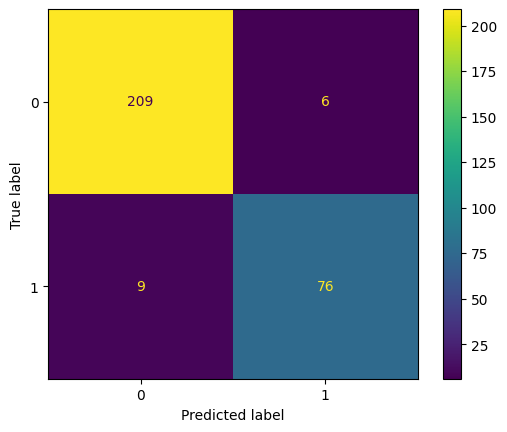

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is CatBoost Classifier with Accuracy 95%